In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from base64 import b64decode
from io import BytesIO
from PIL import Image

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Хакатоны/VK_ML_Lab/post2ctr_dataset.csv')
df

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...,...,...,...,...,...,...
23522,14146,355,123,6,7,146,957,1,"Тамара, выиграет в 24 сезоне ?",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
23523,13392,11,0,3,555,52,106,9,Продажи Manor Lords превысили 1 млн копий. <br...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
23524,21408,1611,9,3,0,453,582,122,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
23525,65138,269,14,69,2036,172,2390,116,Магическая фраза: Уже оплачено&#33;<br><br>Поз...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


# EDA

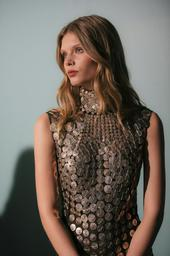

In [3]:
Image.open(BytesIO(b64decode(df.loc[0, "photo"])))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23527 entries, 0 to 23526
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   view              23527 non-null  int64 
 1   like              23527 non-null  int64 
 2   comment           23527 non-null  int64 
 3   hide              23527 non-null  int64 
 4   expand            23527 non-null  int64 
 5   open_photo        23527 non-null  int64 
 6   open              23527 non-null  int64 
 7   share_to_message  23527 non-null  int64 
 8   text              19322 non-null  object
 9   photo             23527 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.8+ MB


In [7]:
df.describe()

,view,like,comment,hide,expand,open_photo,open,share_to_message
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000
mean,2.017510e+04,382.532580,10.259064,10.739576,780.819697,888.538275,5.957260e+02,55.747907
std,7.954857e+04,1447.320109,70.074167,47.420019,10652.744305,6065.675125,9.374567e+03,288.719215
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.709000e+03,27.000000,0.000000,0.000000,0.000000,49.000000,1.400000e+01,2.000000
50%,7.333000e+03,96.000000,2.000000,2.000000,7.000000,153.000000,5.600000e+01,8.000000
75%,1.659850e+04,305.000000,7.000000,7.000000,224.500000,488.000000,2.360000e+02,31.000000
max,7.010336e+06,67834.000000,5561.000000,2899.000000,987856.000000,440489.000000,1.163508e+06,13328.000000


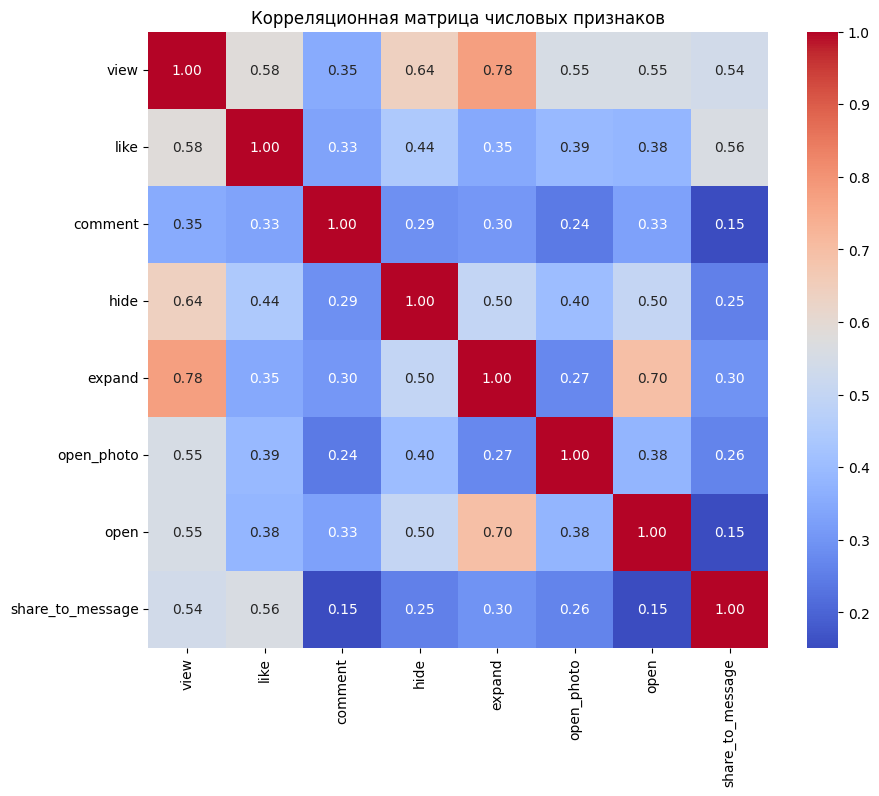

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['text','photo'],axis = 1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица числовых признаков")
plt.show()

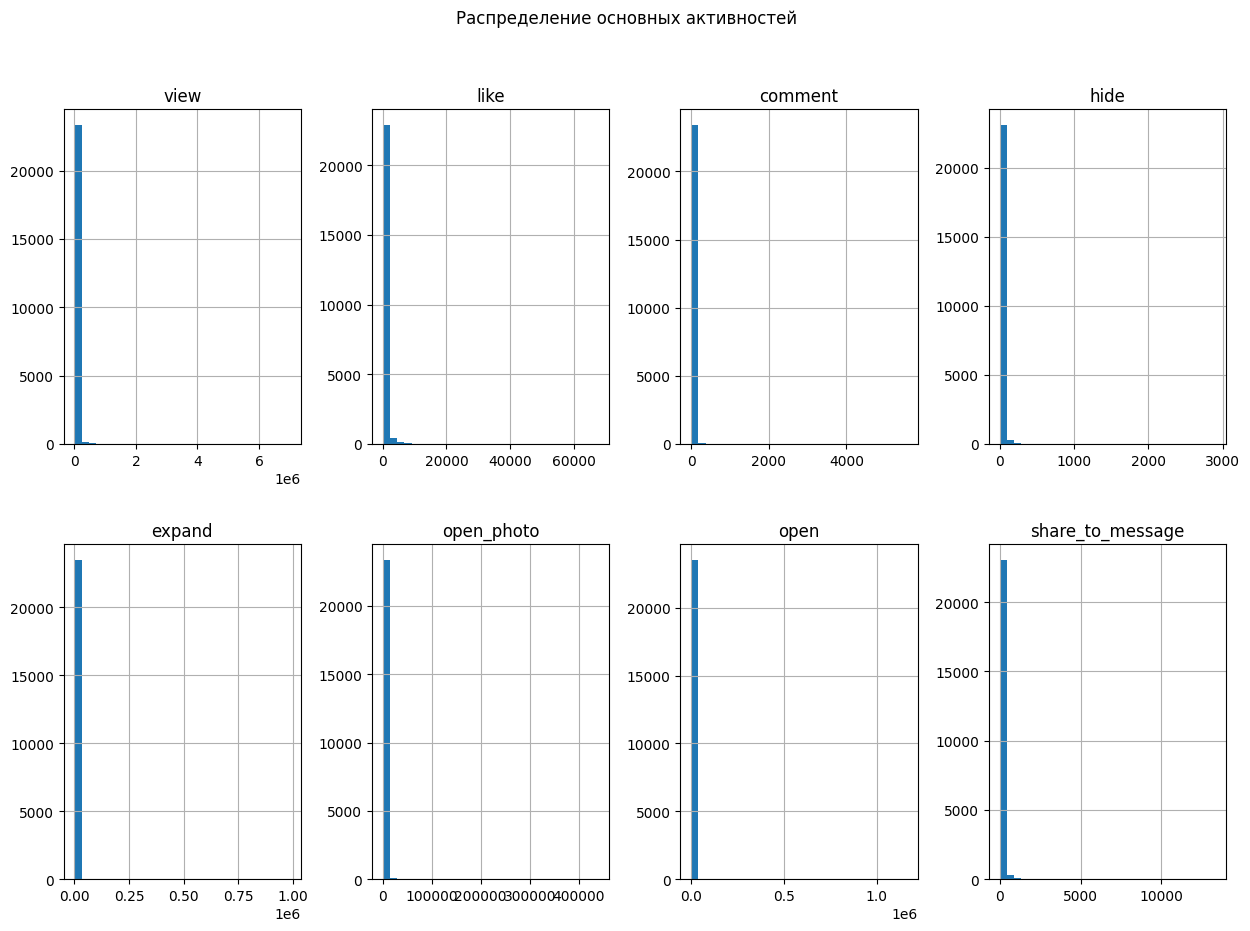

In [9]:
metrics = ['view', 'like', 'comment', 'hide', 'expand', 'open_photo', 'open', 'share_to_message']
df[metrics].hist(bins=30, figsize=(15,10), layout=(2,4))
plt.suptitle('Распределение основных активностей')
plt.show()

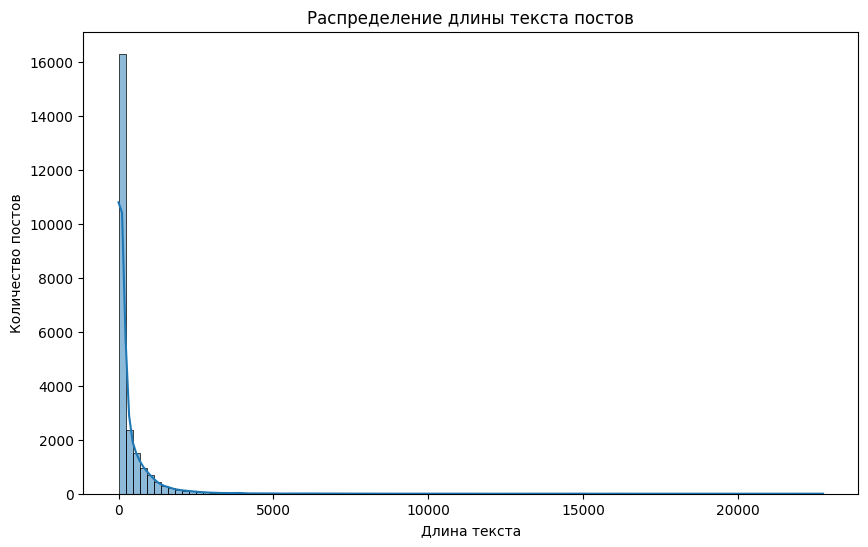

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=100, kde=True)
plt.title("Распределение длины текста постов")
plt.xlabel("Длина текста")
plt.ylabel("Количество постов")
plt.show()

In [11]:
print("\nКоличество постов с изображениями:", df['photo'].notnull().sum())


Количество постов с изображениями: 23527


In [12]:
missing_values = df.isnull().sum()
print("\nПропуски в данных:\n", missing_values)


Пропуски в данных:
 view                   0
like                   0
comment                0
hide                   0
expand                 0
open_photo             0
open                   0
share_to_message       0
text                4205
photo                  0
text_length            0
dtype: int64


In [4]:
df['like_conversion'] = df['like'] / df['view'].replace(0, np.nan)
df['share_conversion'] = df['share_to_message'] / df['view'].replace(0, np.nan)

df

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,like_conversion,share_conversion
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.017021,0.001840
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.024992,0.000220
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004671,0.000747
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.126526,0.005634
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.019732,0.000705
...,...,...,...,...,...,...,...,...,...,...,...,...
23522,14146,355,123,6,7,146,957,1,"Тамара, выиграет в 24 сезоне ?",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.025095,0.000071
23523,13392,11,0,3,555,52,106,9,Продажи Manor Lords превысили 1 млн копий. <br...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.000821,0.000672
23524,21408,1611,9,3,0,453,582,122,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.075252,0.005699
23525,65138,269,14,69,2036,172,2390,116,Магическая фраза: Уже оплачено&#33;<br><br>Поз...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004130,0.001781


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

df['text'] = df['text'].fillna('')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('russian')]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else "")
df['lemmatized_text'] = df['clean_text'].apply(lemmatize_text)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,like_conversion,share_conversion,clean_text,lemmatized_text
0,10869,185,0,2,0,1947,14,20,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.017021,0.001840,,
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.024992,0.000220,,
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004671,0.000747,новость конечно старенькая но все равно интере...,новость старенькая равно интересная около меся...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.126526,0.005634,фантазийные бриллианты,фантазийные бриллианты
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.019732,0.000705,сегодня на стадионе динамо прошли соревнования...,сегодня стадионе динамо прошли соревнования ле...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,14146,355,123,6,7,146,957,1,"Тамара, выиграет в 24 сезоне ?",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.025095,0.000071,тамара выиграет в сезоне,тамара выиграет сезоне
23523,13392,11,0,3,555,52,106,9,Продажи Manor Lords превысили 1 млн копий. <br...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.000821,0.000672,продажи manor lords превысили млн копий br br...,продажи manor lord превысили млн копий br brср...
23524,21408,1611,9,3,0,453,582,122,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.075252,0.005699,,
23525,65138,269,14,69,2036,172,2390,116,Магическая фраза: Уже оплачено&#33;<br><br>Поз...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004130,0.001781,магическая фраза уже оплаченоbrbrпозвольте себ...,магическая фраза оплаченоbrbrпозвольте большеb...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
text_features = tfidf.fit_transform(df['lemmatized_text']).toarray()

text_features_df = pd.DataFrame(text_features, columns=tfidf.get_feature_names_out())

df = pd.concat([df, text_features_df], axis=1)

df

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,...,якобы,яна,январе,января,яркие,яркий,ярким,ярких,ярко,ясно
0,10869,185,0,2,0,1947,14,20,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,14146,355,123,6,7,146,957,1,"Тамара, выиграет в 24 сезоне ?",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23523,13392,11,0,3,555,52,106,9,Продажи Manor Lords превысили 1 млн копий. <br...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23524,21408,1611,9,3,0,453,582,122,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23525,65138,269,14,69,2036,172,2390,116,Магическая фраза: Уже оплачено&#33;<br><br>Поз...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Первичный анализ данных:

1. Пропуски в данных:

  В колонке с текстом постов (text) есть 4205 пропущенных значений. Это примерно 18% данных. Для работы с текстом необходимо либо заполнить эти пропуски, либо исключить их в зависимости от выбранной стратегии.

2. Корреляции между активностями:

  Сильная корреляция между количеством просмотров (view) и такими активностями, как раскрытие поста (expand) и лайки (like), что логично — больше просмотров может привести к большему числу лайков и раскрытий.

  Между лайками и пересылками в личные сообщения (share_to_message) тоже есть неплохая корреляция (0.56), что указывает на взаимосвязь.

  Количество комментариев (comment) имеет слабую корреляцию с пересылками (0.15), что может говорить о том, что посты, вызывающие обсуждение, не всегда стимулируют делиться ими.

3. Распределение данных:

  Медианные значения для активностей, таких как лайки, комментарии и пересылки, показывают, что большая часть постов получает относительно небольшое количество активностей, но есть выбросы (посты с очень большим числом активностей).
  
  Стандартное отклонение указывает на сильную вариативность в данных, особенно в активности открытия постов и пересылок.

4. Тексты и изображения:

  Длина текстов сильно варьируется, но 4205 записей не содержат текста, что может влиять на анализ.

  Все посты содержат изображения, что открывает возможность для работы с визуальными данными.

# Эксперимент с конверсий в лайк без изображений

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['like', 'like_conversion', 'photo', 'text','share_conversion','clean_text','lemmatized_text'])
y = df['like_conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics_results = []

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
metrics_results.append({'Model': 'Linear Regression', 'MSE': lr_mse})

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
metrics_results.append({'Model': 'Random Forest', 'MSE': rf_mse})

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
metrics_results.append({'Model': 'XGBoost', 'MSE': xgb_mse})

metrics_df = pd.DataFrame(metrics_results)

metrics_df

,Model,MSE
0,Linear Regression,0.001210
1,Random Forest,0.000680
2,XGBoost,0.000665


# Эксперимент с конверсий в поделиться без изображений

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['like', 'like_conversion', 'photo', 'text','share_conversion','clean_text','lemmatized_text'])
y = df['share_conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics_results2 = []

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
metrics_results2.append({'Model': 'Linear Regression', 'MSE': lr_mse})

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
metrics_results2.append({'Model': 'Random Forest', 'MSE': rf_mse})

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
metrics_results2.append({'Model': 'XGBoost', 'MSE': xgb_mse})

metrics_df = pd.DataFrame(metrics_results2)

metrics_df

,Model,MSE
0,Linear Regression,1.759829e-05
1,Random Forest,1.822928e-07
2,XGBoost,3.275800e-07


# Эксперимент с конверсий в лайк с изображениями



In [17]:
def process_image(image_base64, size=(32, 32)):
    try:
        image_data = b64decode(image_base64)
        image = Image.open(BytesIO(image_data)).convert('RGB')
        image = image.resize(size)
        return np.array(image).flatten()
    except Exception as e:
        print(f"Error processing image: {e}")
        return np.zeros(size[0] * size[1] * 3)

df['image_features'] = df['photo'].apply(lambda x: process_image(x))

image_features_df = pd.DataFrame(df['image_features'].tolist(),
                                 columns=[f'pixel_{i}' for i in range(32*32*3)])

df = pd.concat([df, image_features_df], axis=1)

X = df.drop(columns=['like', 'like_conversion', 'photo', 'text','share_conversion','clean_text','lemmatized_text','image_features'])
y = df['like_conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics_results3 = []

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
metrics_results3.append({'Model': 'Linear Regression', 'MSE': lr_mse})

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
metrics_results3.append({'Model': 'Random Forest', 'MSE': rf_mse})

metrics_df = pd.DataFrame(metrics_results3)

metrics_df

,Model,MSE
0,Linear Regression,5.787596e+09
1,Random Forest,7.455183e-04


# Эксперимент с конверсий в поделиться с изображениями

In [ ]:
def process_image(image_base64, size=(32, 32)):
    try:
        image_data = b64decode(image_base64)
        image = Image.open(BytesIO(image_data)).convert('RGB')
        image = image.resize(size)
        return np.array(image).flatten()
    except Exception as e:
        print(f"Error processing image: {e}")
        return np.zeros(size[0] * size[1] * 3)

df['image_features'] = df['photo'].apply(lambda x: process_image(x))

image_features_df = pd.DataFrame(df['image_features'].tolist(),
                                 columns=[f'pixel_{i}' for i in range(32*32*3)])

df = pd.concat([df, image_features_df], axis=1)

X = df.drop(columns=['like', 'like_conversion', 'photo', 'text','share_conversion','clean_text','lemmatized_text','image_features'])
y = df['share_conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics_results4 = []

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
metrics_results4.append({'Model': 'Linear Regression', 'MSE': lr_mse})

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
metrics_results4.append({'Model': 'Random Forest', 'MSE': rf_mse})

metrics_df = pd.DataFrame(metrics_results4)

metrics_df